## Imports

In [1]:
from IPython.display import Image, display

## Philosophy behind CI/CD for Machine Learning

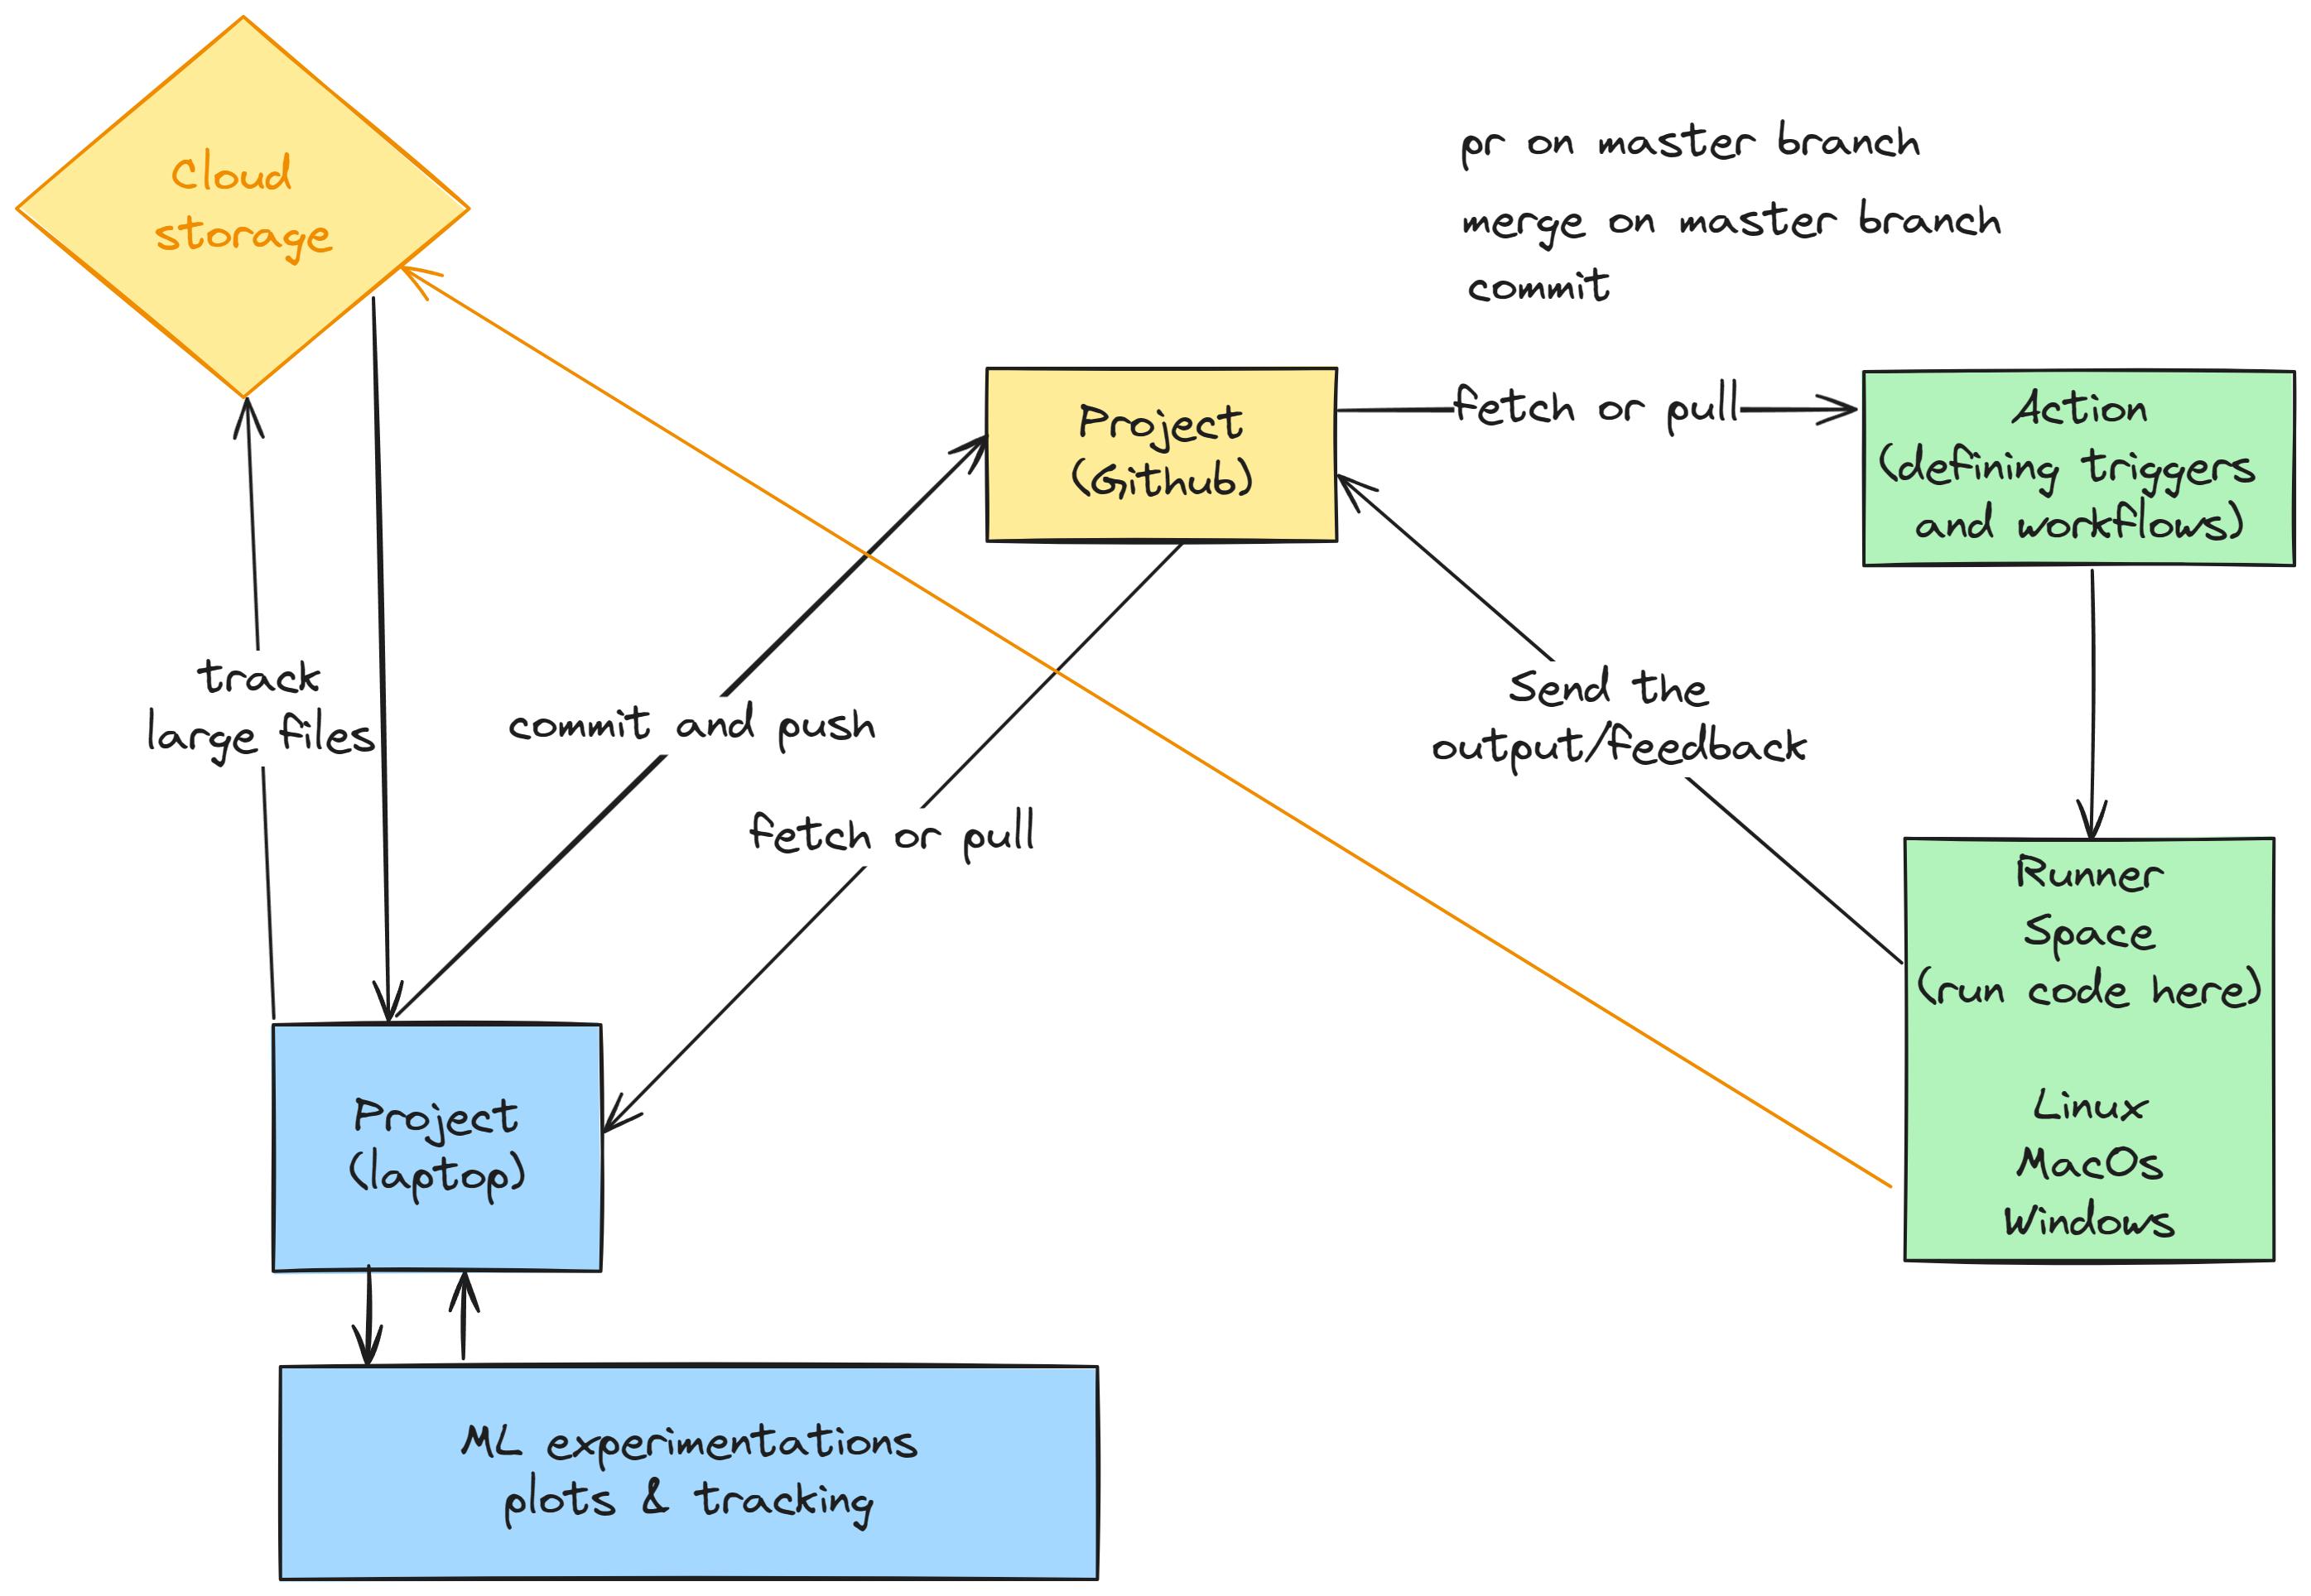

In [4]:
file='../img/ci_flow.png'
display(Image(filename=file, embed=True, width=800, height=800))

### 1. Automation

CI/CD emphasizes automation in the software development and machine learning lifecycle. Automation reduces manual errors, accelerates development, and ensures consistency.

### 2. Continuous Integration (CI)

CI involves regularly merging code changes into a shared repository. For ML, this means integrating new models, datasets, or code changes into the project repository to trigger automated testing.

### 3. Continuous Delivery/Deployment (CD)

CD extends CI by automatically delivering or deploying the integrated code to production. In ML, this could involve deploying updated models or datasets to a production environment.

### 4. Version Control

Version control, such as Git, is fundamental. DVC extends version control to handle large files and datasets efficiently, ensuring reproducibility and traceability in ML projects.

### 5. Experiment Tracking

Tracking experiments is crucial for understanding model performance and changes over time. Tools like MLflow or TensorBoard can be integrated into the CI/CD pipeline to monitor and log experiments.

### 6. Collaboration

CI/CD encourages collaboration by providing a centralized platform (e.g., GitHub) where team members can contribute, review, and track changes.

## CI/CD Tutorial Outline

### 1. Setting up GitHub Actions for CI/CD

#### Introduction to GitHub Actions

Explain the concept of workflows and how they define automation.

[Github Actions 5min walkthrough](https://docs.github.com/en/actions/quickstart)

#### Workflow file

```yaml
# .github/workflows/ci_cd.yml

name: CI Pipeline

on:
  push:

jobs:
  build:
    runs-on: ubuntu-latest

    steps:
    - name: Checkout Repository
      uses: actions/checkout@v3

    - name: Set up Python
      uses: actions/setup-python@v4
      with:
        python-version: 3.11

    - name: Install Dependencies
      run: |
        python -m pip install --upgrade pip
        pip install -r requirements.txt
    
    - name: Run main file
      run: |
        python main.py
    
    - name: Run Tests
      run: |
        python -m unittest discover

```

### 2. Integrating CML for Version Control

#### Integrating CML with GitHub Actions

CML helps you automatically train and evaluate machine learning models right in your pull/merge requests. It can also embed reports from the results, including plots and metrics.

```yaml
# .github/workflows/ci_cd.yml

name: CI Pipeline

on:
  push:

jobs:
  build:
    runs-on: ubuntu-latest

    steps:
    - name: Checkout Repository
      uses: actions/checkout@v3

    - name: Set up Python
      uses: actions/setup-python@v4
      with:
        python-version: 3.11

    - name: Install Dependencies
      run: |
        python -m pip install --upgrade pip
        pip install -r requirements.txt
    
    - name: Run main file
      run: |
        python main.py
    
    - name: Run Tests
      run: |
        python -m unittest discover
    
## Only CML specefic code

    - name: Create CML report
      env:
        REPO_TOKEN: ${{ secrets.GITHUB_TOKEN }}
      run: |

        echo "# First Line of our report" >> report.md
        echo "## Bar Plots" >> report.md
        echo '![](./bars.png "Bar plot")' >> report.md
        echo "## Line Plots" >> report.md
        echo '![](./lines.png "Bar plot")' >> report.md

        cml comment create report.md

```

## Containerization  Philosophy

### Containerization

Containerization is a lightweight and efficient way to package, distribute, and run applications. It encapsulates an application and its dependencies into a single, standardized unit known as a container. Containers provide consistency across various environments, making it easier to develop, deploy, and scale applications.

Key aspects of containerization:
- **Isolation:** Containers encapsulate applications and their dependencies, ensuring isolation from the underlying system and other containers.
- **Portability:** Containers can run consistently across different environments, whether it's a developer's laptop, a testing environment, or a production server.
- **Resource Efficiency:** Containers share the host OS kernel, making them more lightweight than traditional virtual machines.

## Docker Tutorial

#### Installing Docker

Before we start, make sure Docker is installed on your machine. You can download and install Docker from the [official website](https://www.docker.com/get-started).

#### Running Your First Container

Let's start by running a simple container. Open your terminal and execute the following command:

```bash
docker run hello-world
```

This command pulls the "hello-world" image from Docker Hub and runs it in a container. You should see a welcome message indicating that your installation is working.

#### Building Your Own Image

Now, let's create a simple web application and containerize it.

- Clone the sample application to use with this guide. Open a terminal, change directory to a directory that you want to work in, and run the following command to clone the repository

```bash
git clone https://github.com/docker/python-docker

```

- Go to `python-docker` and create or activate a python 3.11 environment:

```bash
# If you want to create a conda environment with python 3.11
conda create -n python311 python=3.11

# If you want to activate a conda environment with python 3.11
conda activate python311

## NOTE - It is a good practice to keep your environment name specific to python versions If needed, add project name.
## For example, python311-docker-test

```

- Now that you have an application, you can use `docker init` to create the necessary Docker assets to containerize your application. Inside the `python-docker` directory, run the `docker init` command. Refer to the following example to answer the prompts from `docker init`:

```bash
docker init
Welcome to the Docker Init CLI!

This utility will walk you through creating the following files with sensible defaults for your project:
  - .dockerignore
  - Dockerfile
  - compose.yaml

Let's get started!

? What application platform does your project use? Python
? What version of Python do you want to use? 3.11.4
? What port do you want your app to listen on? 5000
? What is the command to run your app? python3 -m flask run --host=0.0.0.0
```

#### Running Your Web Application Container


Inside the `python-docker` directory, run the following command in a terminal.
```bash
docker compose up --build

```

Visit http://localhost:PORT in your web browser, and you should see your "Hello, Docker!" web page.


Common gotchas:
- You need to use the port number that you set during question 3 of `docker init`.
- If you crate a a cond aenv with some python version that does not match your input for question 2, the application may not run.
- For question 4, if you are using `gunicorn` to run the application using the defaults, you need to add gunicorn in the requirements file.

## Asssignment [Multi-Container Applications with Docker Compose]

#### Creating a Multi-Container Application

Consider a scenario where you have a web application that communicates with a backend database. We'll create two containers, one for the web application and another for the database.

- Create a `docker-compose.yml` file:
```yaml
version: '3'
services:
  web:
    image: nginx:alpine
    ports:
      - "8080:80"
  db:
    image: mysql:5.7
    environment:
      MYSQL_ROOT_PASSWORD: example
      MYSQL_DATABASE: app_db
      MYSQL_USER: app_user
      MYSQL_PASSWORD: app_password

```

This `docker-compose.yml file` defines two services: `web` and `db`. The `web` service uses the Nginx image, while the `db` service uses the MySQL image. The `environment` section sets up MySQL with a root password and a database for our application.


- Run the multi-container application:
```bash
docker-compose up

```
This command starts both containers defined in the docker-compose.yml file.

#### Scaling with Docker Compose

Scaling is a crucial aspect of container orchestration. Docker Compose allows you to scale services easily.

- Update the `docker-compose.yml` file to include a service that can be scaled:

```yaml
version: '3'
services:
  web:
    image: nginx:alpine
    ports:
      - "8080:80"
  db:
    image: mysql:5.7
    environment:
      MYSQL_ROOT_PASSWORD: example
      MYSQL_DATABASE: app_db
      MYSQL_USER: app_user
      MYSQL_PASSWORD: app_password
  app_server:
    image: custom_app_image
    ports:
      - "5000:5000"

```

Here, we've added an `app_server` service. Replace `custom_app_image` with the actual image for your application server

- Scale the `app_server` service:

```bash
docker-compose up --scale app_server=3

```

This command scales the app_server service to three instances. You can adjust the number based on your requirements.

## Continuous Deployment Tutorial for Beginners

Continuous Deployment (CD) is a software development practice that automates the deployment process, allowing for frequent and reliable releases. In this tutorial, we'll guide you through setting up a simple Python web application. In the next week we will use github actions to deploy this on internet using AWS

#### Important pre-read

Before you begin, try to have clear understanding of the following:

- Basic knowledge of Git and GitHub
- A Python application (e.g., using Streamlit or FastAPI)

#### Set Up Your Python Application (local deployment)

1. **Clone your Python application from GitHub:**

   ```bash
   git clone https://github.com/your-username/your-python-app.git
   ```

2. **Navigate to your project directory:**

   ```bash
   cd your-python-app
   ```

3. **Install dependencies:**

   ```bash
   pip install -r requirements.txt
   ```

4. **Verify that your application runs locally:**

   ```bash
   python app.py
   ```

   Open your browser and go to `http://localhost:5000` (or the appropriate port) to ensure your app is working correctly.

## Orchestration Philosophy

### Orchestration

Orchestration is the automated management, coordination, and deployment of multiple containers in a distributed environment. It addresses challenges such as scaling, load balancing, and service discovery.

Key aspects of orchestration:
- **Scaling:** Easily scale the number of containers to handle increased load or demand.
- **Service Discovery:** Automatically discover and connect containers to form a distributed application.
- **Load Balancing:** Distribute incoming traffic across multiple containers to ensure optimal performance and reliability.
- **Fault Tolerance:** Orchestration tools help in maintaining application availability by handling container failures and replacing them as needed.